<a href="https://colab.research.google.com/github/lebaobao1211/LeBaoBao/blob/main/cat_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 234MB/s]
100% 1.06G/1.06G [00:05<00:00, 204MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#create CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', input_shape = (256,256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Ensure that the necessary modules are imported
# You may need to install them if they are not already available
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.5842 - loss: 0.6774 - val_accuracy: 0.7222 - val_loss: 0.5337
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7590 - loss: 0.4969 - val_accuracy: 0.7862 - val_loss: 0.4539
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8250 - loss: 0.3899 - val_accuracy: 0.7900 - val_loss: 0.4625
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.8974 - loss: 0.2472 - val_accuracy: 0.7904 - val_loss: 0.6042
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9485 - loss: 0.1351 - val_accuracy: 0.7840 - val_loss: 0.8407
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9724 - loss: 0.0809 - val_accuracy: 0.7874 - val_loss: 0.8774
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9860 - loss: 0.0431 - val_accuracy: 0.7892 - val_loss: 1.1621
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9810 - loss: 0.0572 - 

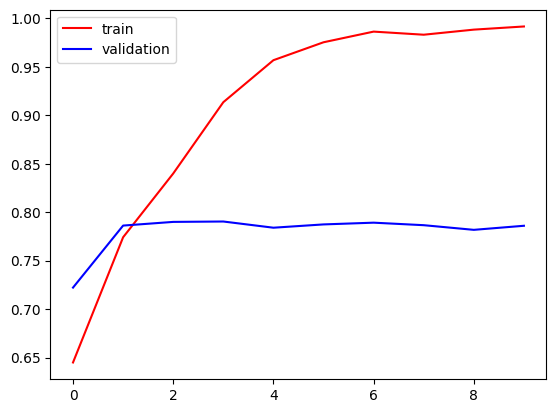

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

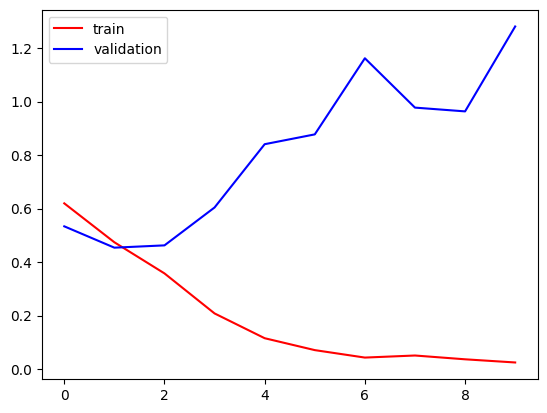

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2
import matplotlib.pyplot as plt

In [20]:
test_img = cv2.imread('/testmeo.jpg')

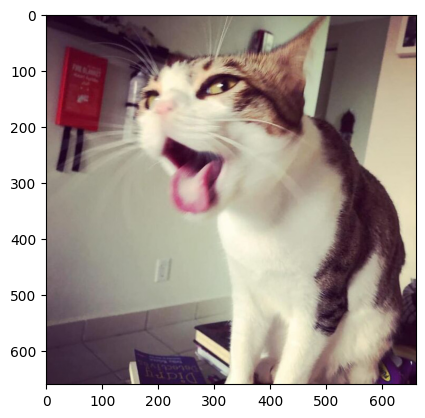

In [21]:
# Check if the image was loaded successfully
if test_img is not None:
    # Convert from BGR (OpenCV default) to RGB (Matplotlib default)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
else:
    print('Image not loaded correctly. Check the file path.')

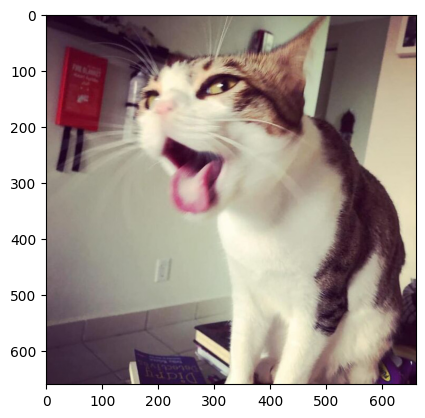

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(660, 660, 3)

In [24]:
test_img= cv2.resize(test_img, (256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


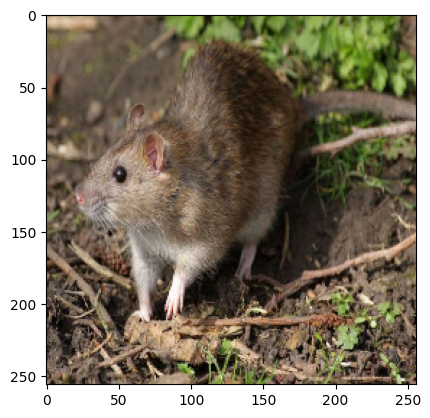

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Dự đoán: Mèo


In [33]:
import cv2
import matplotlib.pyplot as plt

# Read and display the image you want to predict
test_img = cv2.imread('/testratatu.webp')

if test_img is not None:
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (256, 256))  # Resize photos of size suitable for the model
    plt.imshow(test_img)
    plt.show()

    # Photo processing
    test_input = test_img.reshape((1, 256, 256, 3))
    test_input = test_input / 255.0  # Divided by 255 for standardization

    # Forecast
    prediction = model.predict(test_input)

    # result
    if prediction < 0.5:
        print("Dự đoán: Mèo")
    else:
        print("Dự đoán: Chó")
else:
    print('Không thể tải ảnh. Kiểm tra lại đường dẫn.')


In [36]:
!pip install tensorflow
import tensorflow as tf # import tensorflow

In [38]:
!pip install torch # install the torch module
import torch # import the torch module



In [40]:
model.save('/content/drive/MyDrive/saved_model.h5')